In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Replace 'file_path.xlsx' with the path to your XLSX file
file_path = "./KidAI (Responses).xlsx"

In [3]:
# Read the Excel file into a DataFrame
df = pd.read_excel(file_path)

In [4]:
df.head()

,Timestamp,المرحلة العمرية,السن,هل انت مهتم تعرف اكترعن ايه هو ال AI (الذكاء الاصطناعي),هل تعرف اي معلومات عن الذكاء الاصطناعي AI,هل سمعت عن تعلم الالة قبل كدا او ال machine learning
0,2024-07-02 22:57:10.790,اعدادي,15,نعم,لا,نعم
1,2024-07-02 22:58:48.282,اعدادي,13,نعم,لا,لا
2,2024-07-02 22:59:01.857,اعدادي,13,نعم,نعم,لا
3,2024-07-02 22:59:03.348,ثانوي,15,نعم,نعم,نعم
4,2024-07-02 22:59:10.253,اعدادي,31/1/2011,نعم,لا,نعم


In [5]:
# drop Timestamp column
df.drop("Timestamp", axis=1, inplace=True)

In [6]:
# drop السن column
df.drop("السن", axis=1, inplace=True)

In [7]:
# rename columns
df.columns = ["grade", "AI_interest", "AI_info", "machine_learning"]

In [8]:
df.head()

,grade,AI_interest,AI_info,machine_learning
0,اعدادي,نعم,لا,نعم
1,اعدادي,نعم,لا,لا
2,اعدادي,نعم,نعم,لا
3,ثانوي,نعم,نعم,نعم
4,اعدادي,نعم,لا,نعم


In [9]:
# convert نعم to yes and لا to no
df.replace("نعم", "yes", inplace=True)
df.replace("لا", "no", inplace=True)

In [10]:
df.head()

,grade,AI_interest,AI_info,machine_learning
0,اعدادي,yes,no,yes
1,اعدادي,yes,no,no
2,اعدادي,yes,yes,no
3,ثانوي,yes,yes,yes
4,اعدادي,yes,no,yes


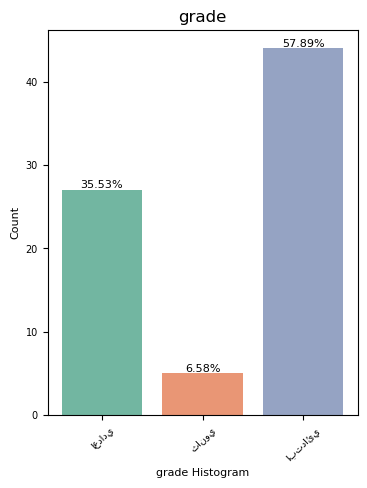

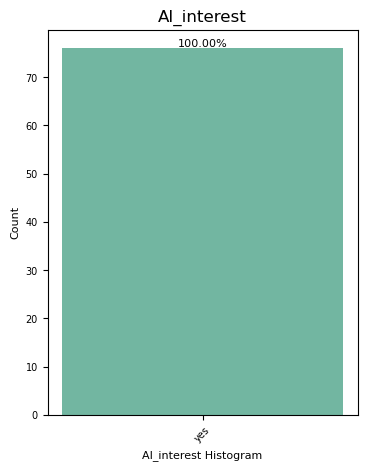

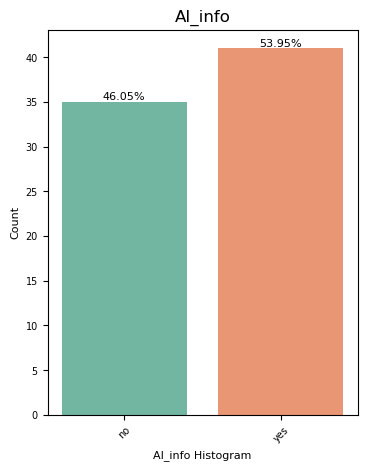

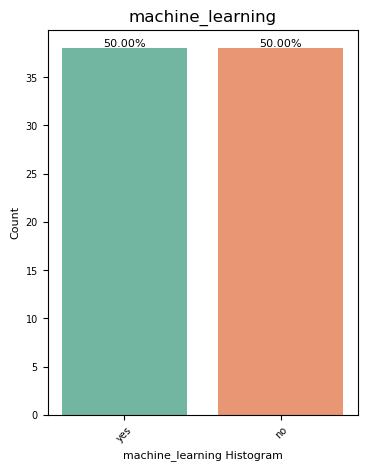

In [20]:
for col in df.columns:
    # target variable analysis
    plt.figure(figsize=(4, 5))
    sns.countplot(x=col, data=df, palette="Set2", ax=plt.gca())
    # data[target].value_counts().plot(kind='bar', title='Body Level')
    # add percentages
    for p in plt.gca().patches:
        plt.gca().text(
            p.get_x() + p.get_width() / 2.0,
            p.get_height(),
            "{:1.2f}%".format(100 * p.get_height() / len(df)),
            fontsize=8,
            color="black",
            ha="center",
            va="bottom",
        )
    plt.xticks(rotation=45, fontsize=7)
    plt.yticks(fontsize=7)
    plt.xlabel(f"{col} Histogram", fontsize=8)
    plt.ylabel("Count", fontsize=8)
    plt.title(col)
    plt.axis("tight")
    plt.savefig(f"./images/{col}", dpi=300, bbox_inches="tight")
    plt.show()

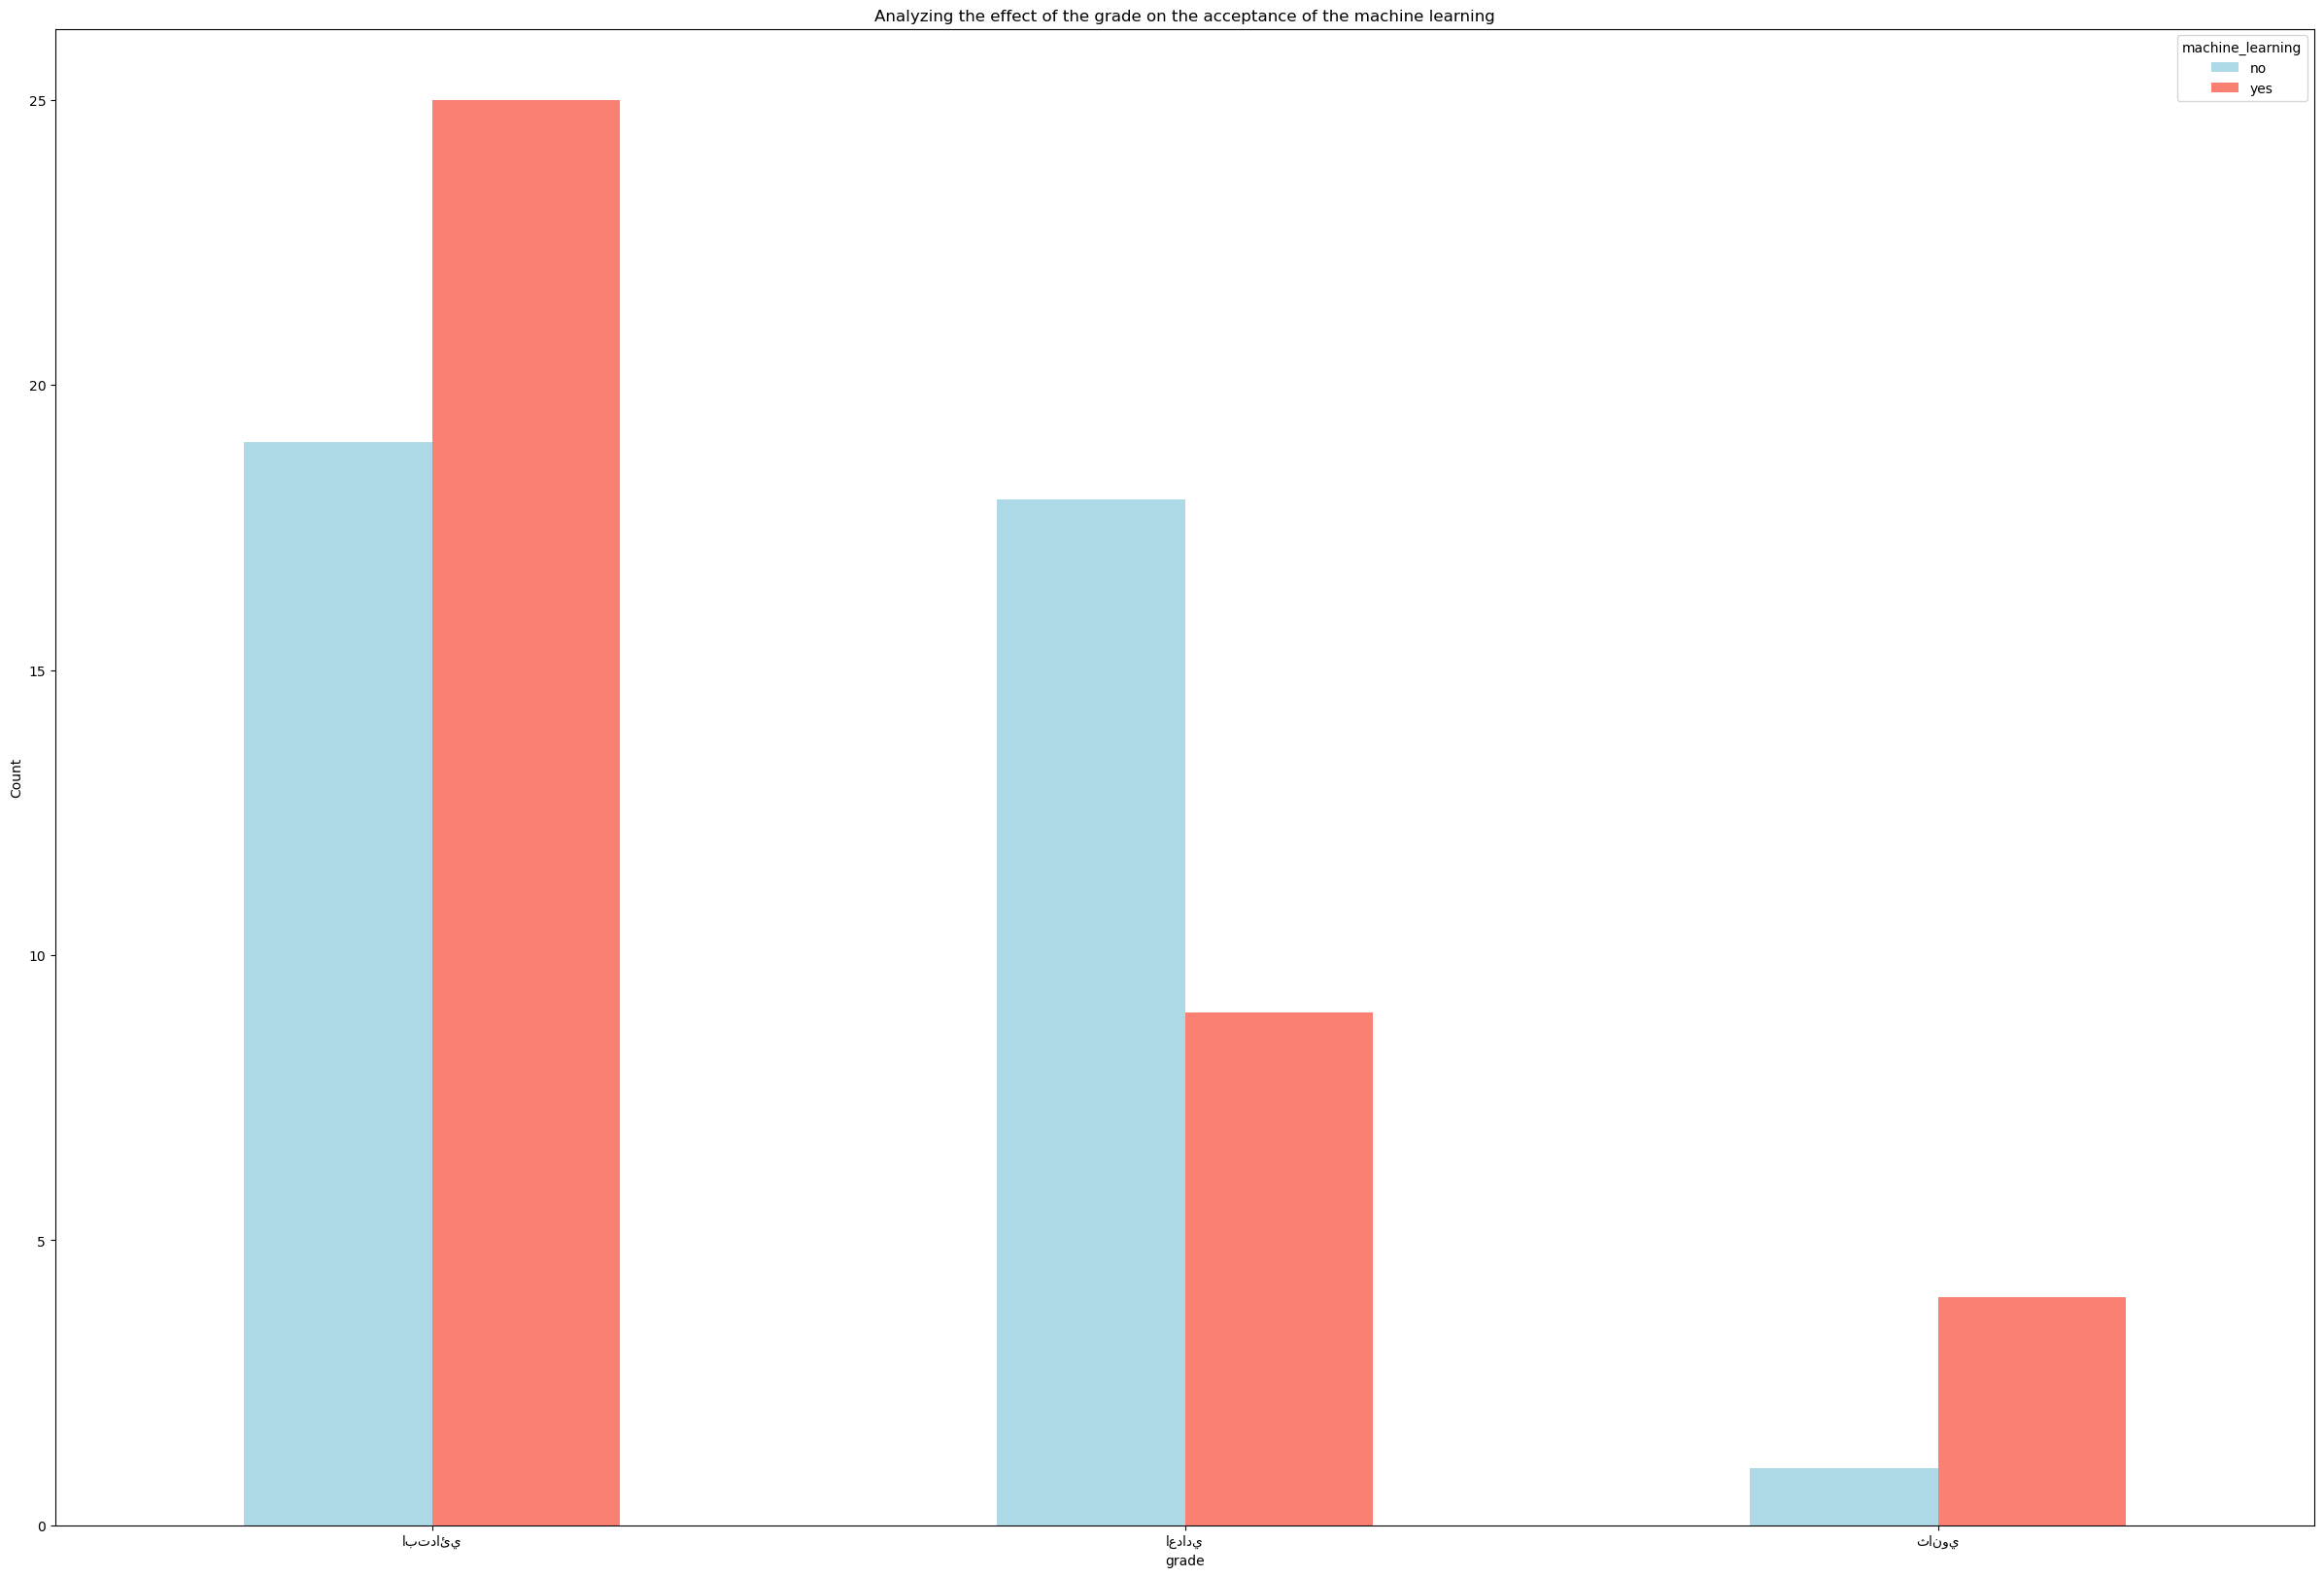

In [30]:
# the effect of the loan Sector on the acceptance of the loan
pd.crosstab(df["grade"], df["machine_learning"]).plot(
    kind="bar", figsize=(30, 20), color=["lightblue", "salmon"]
)
plt.title(
    f"Analyzing the effect of the grade on the acceptance of the machine learning"
)

plt.xlabel("grade")
plt.ylabel(f"Count")
plt.xticks(rotation=0)
# save the plot
plt.savefig(f"./images/grade_machine.png", dpi=300, bbox_inches="tight")
plt.show()

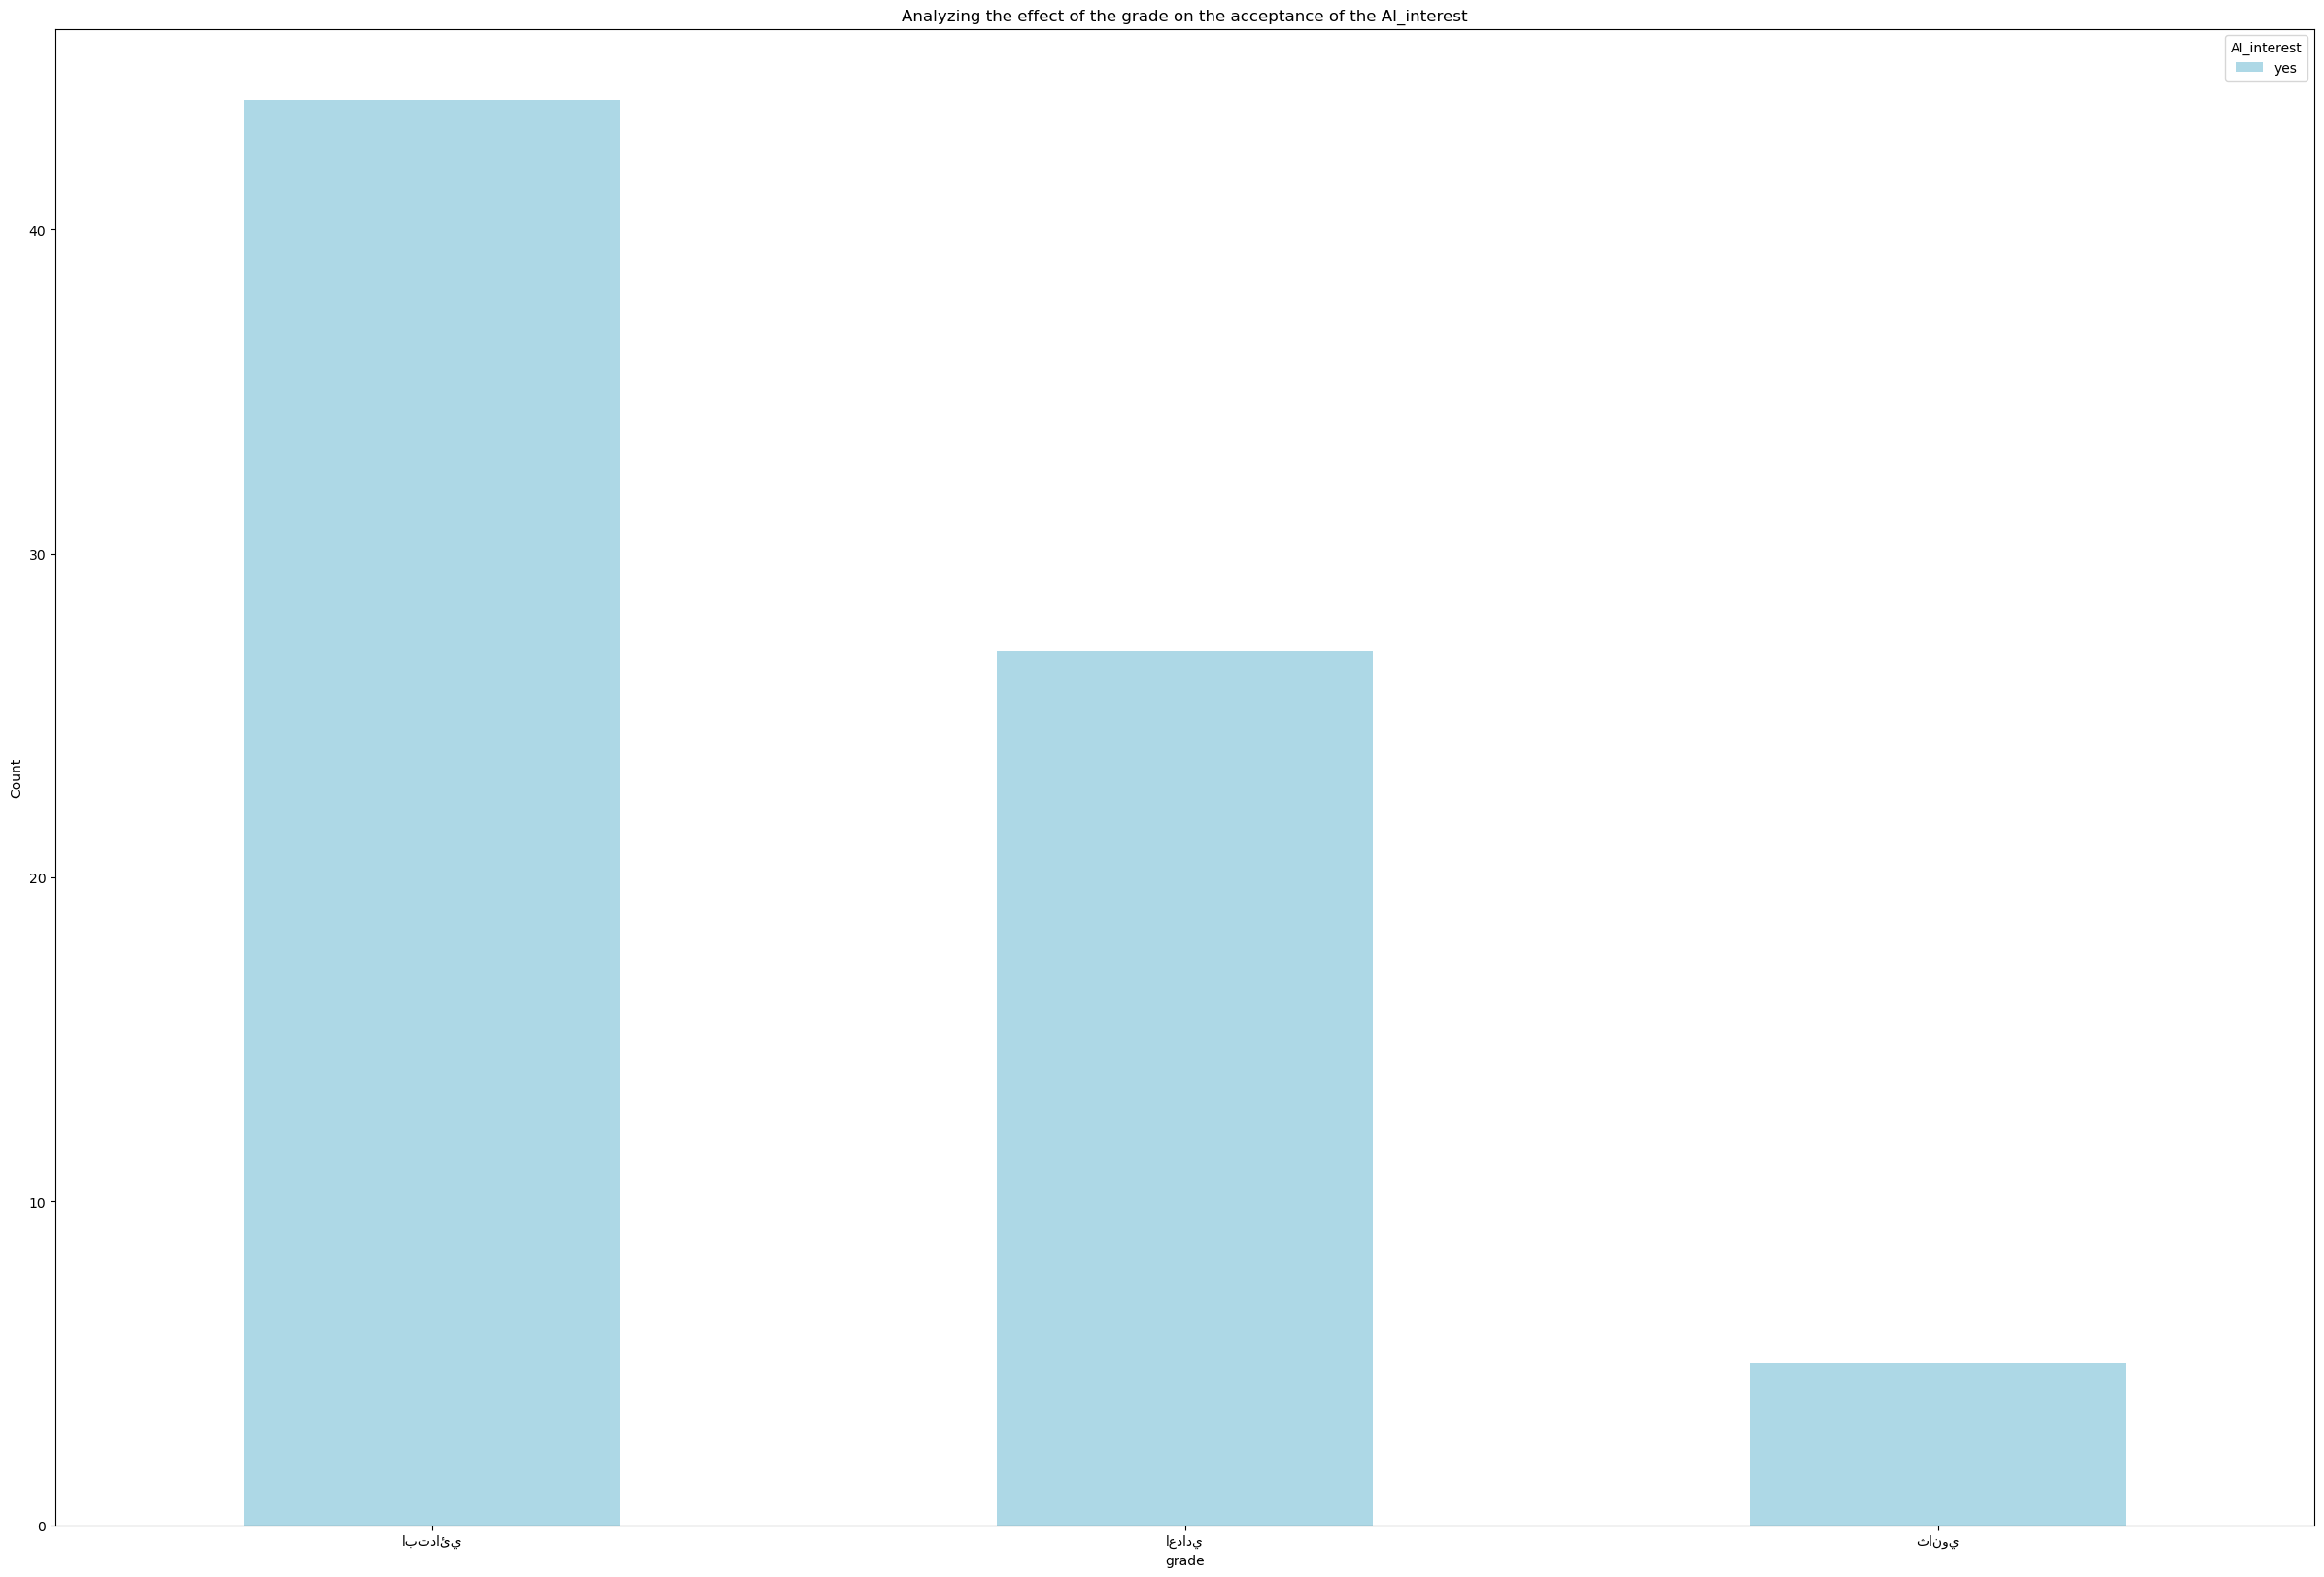

In [12]:
# the effect of the loan Sector on the acceptance of the loan
pd.crosstab(df["grade"], df["AI_interest"]).plot(
    kind="bar", figsize=(30, 20), color=["lightblue", "salmon"]
)
plt.title(f"Analyzing the effect of the grade on the acceptance of the AI_interest")
plt.xlabel("grade")
plt.ylabel(f"Count")
plt.xticks(rotation=0)
# save the plot
plt.savefig(f"./images/grade_AI_interest.png", dpi=300, bbox_inches="tight")
plt.show()

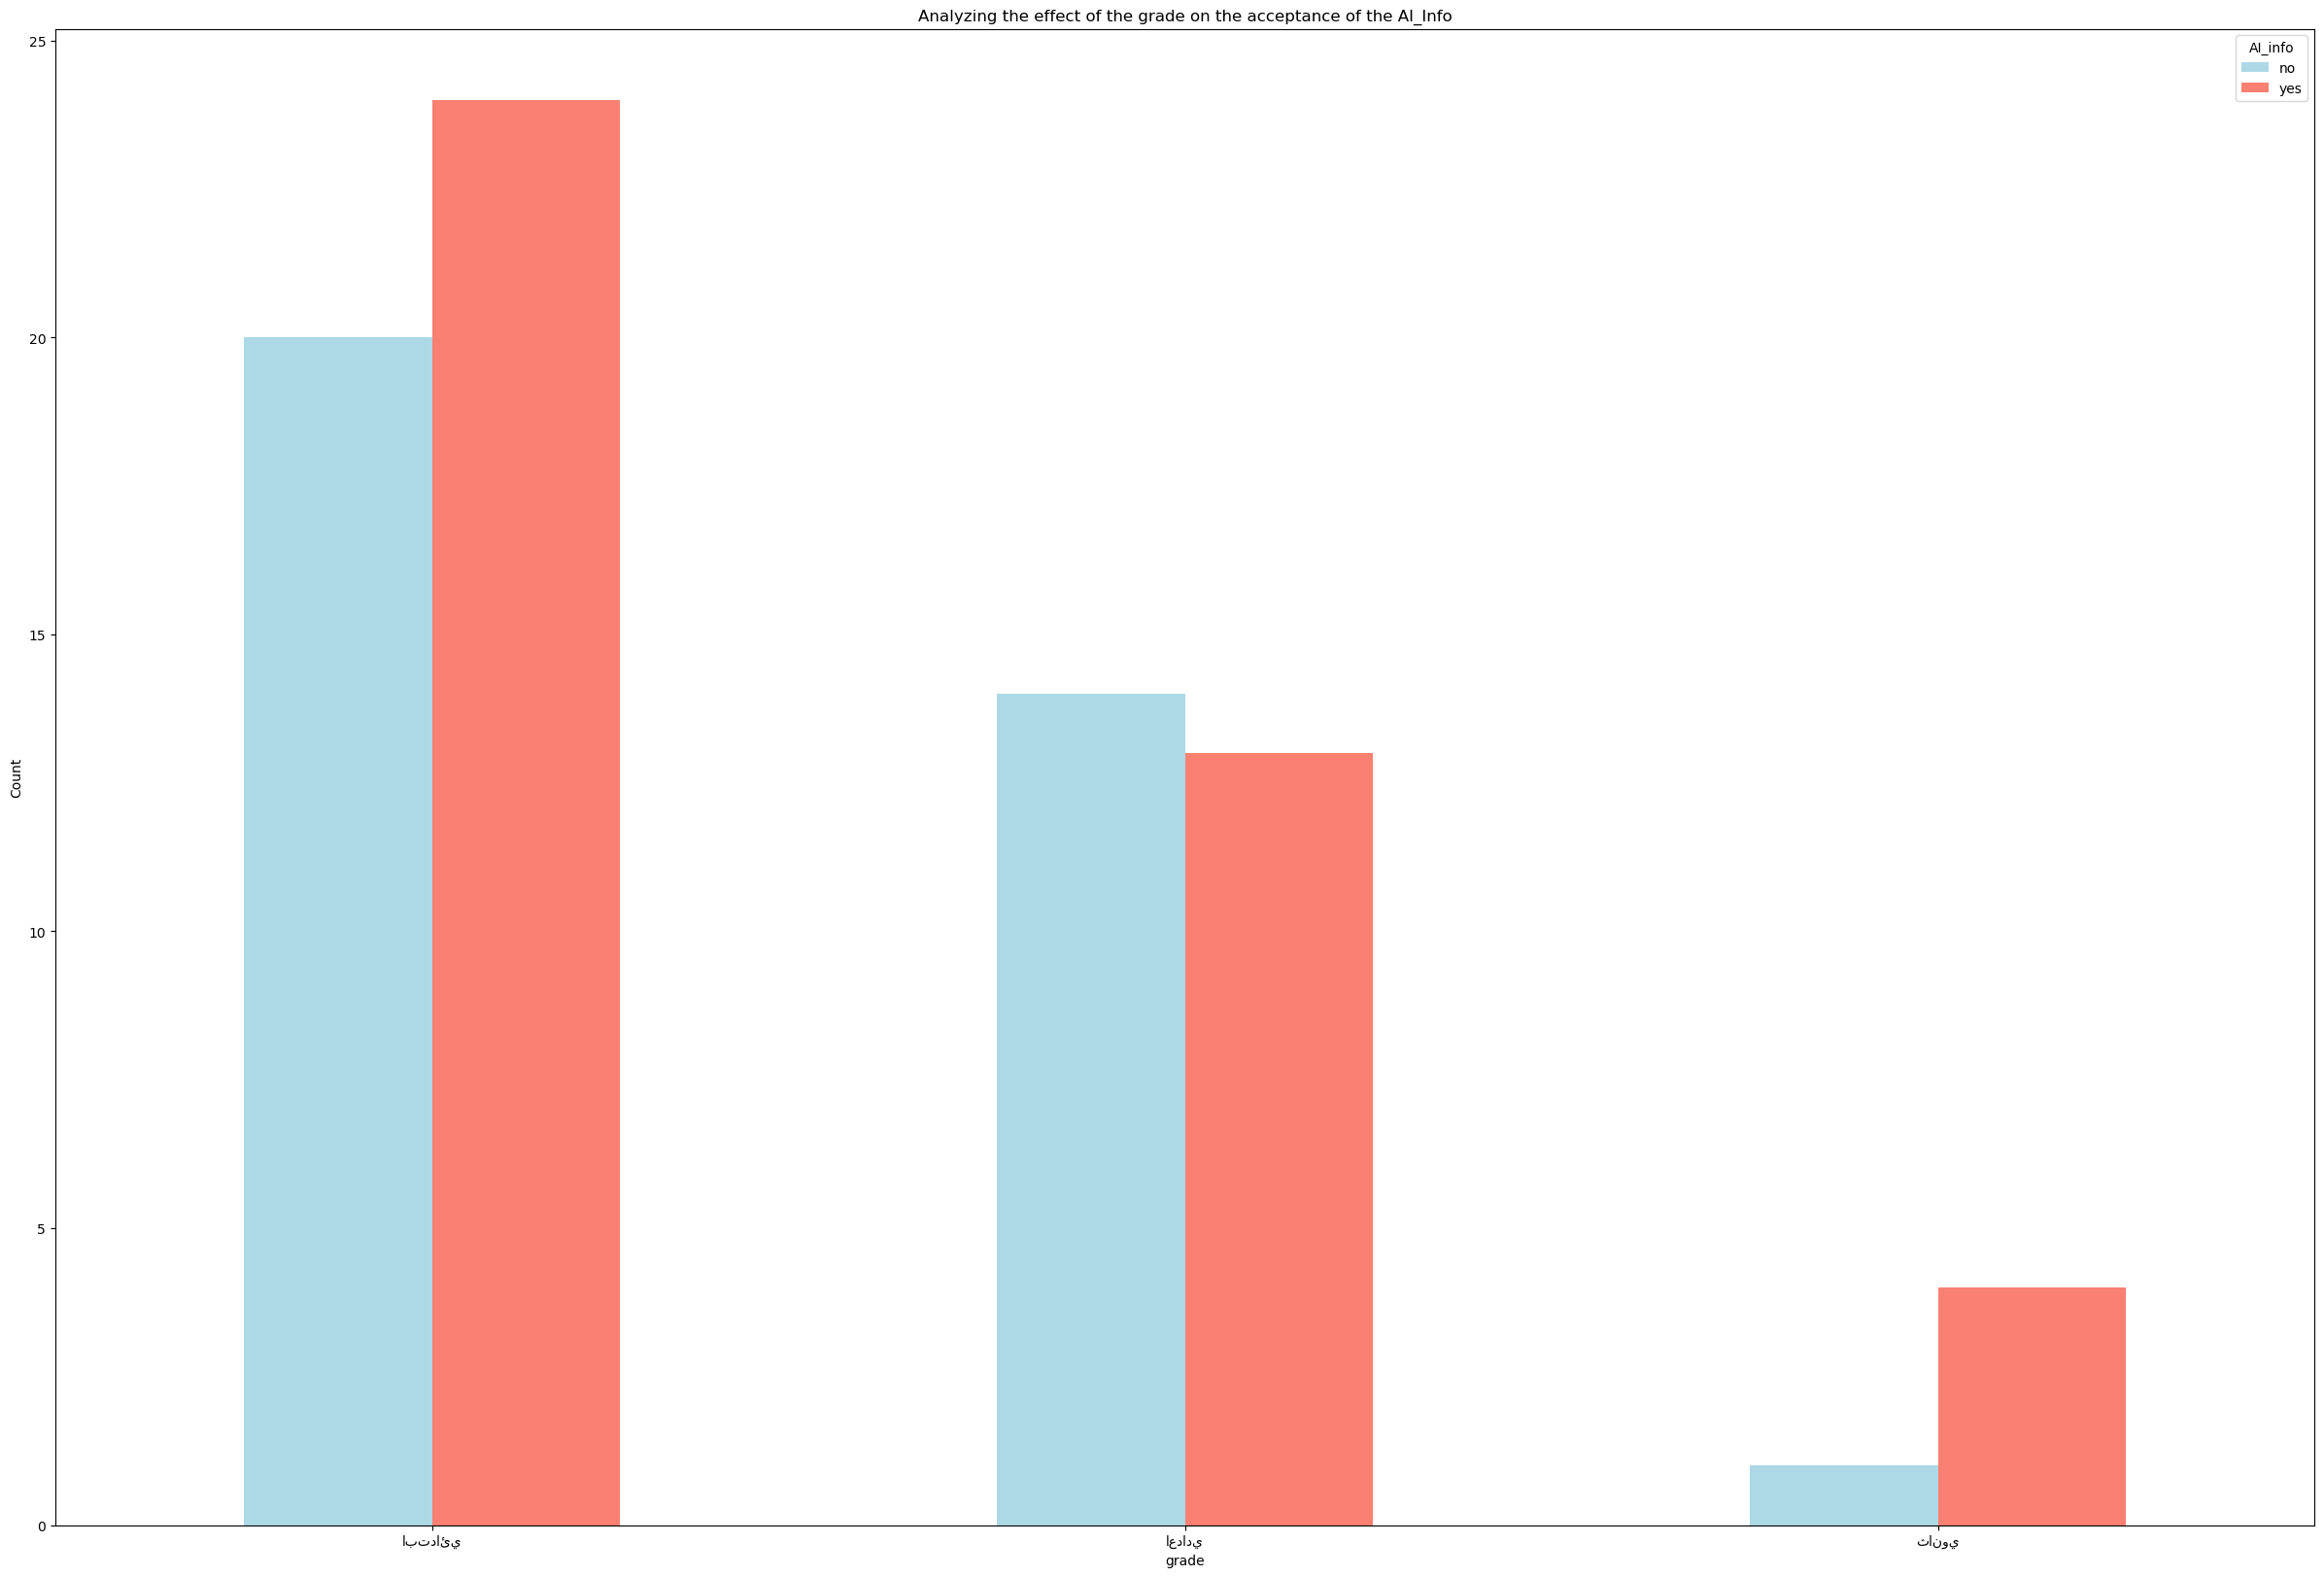

In [31]:
# the effect of the loan Sector on the acceptance of the loan
pd.crosstab(df["grade"], df["AI_info"]).plot(
    kind="bar", figsize=(30, 20), color=["lightblue", "salmon"]
)
plt.title(f"Analyzing the effect of the grade on the acceptance of the AI_Info")
plt.xlabel("grade")
plt.ylabel(f"Count")
plt.xticks(rotation=0)
# save the plot
plt.savefig(f"./images/grade_AI_info.png", dpi=300, bbox_inches="tight")
plt.show()

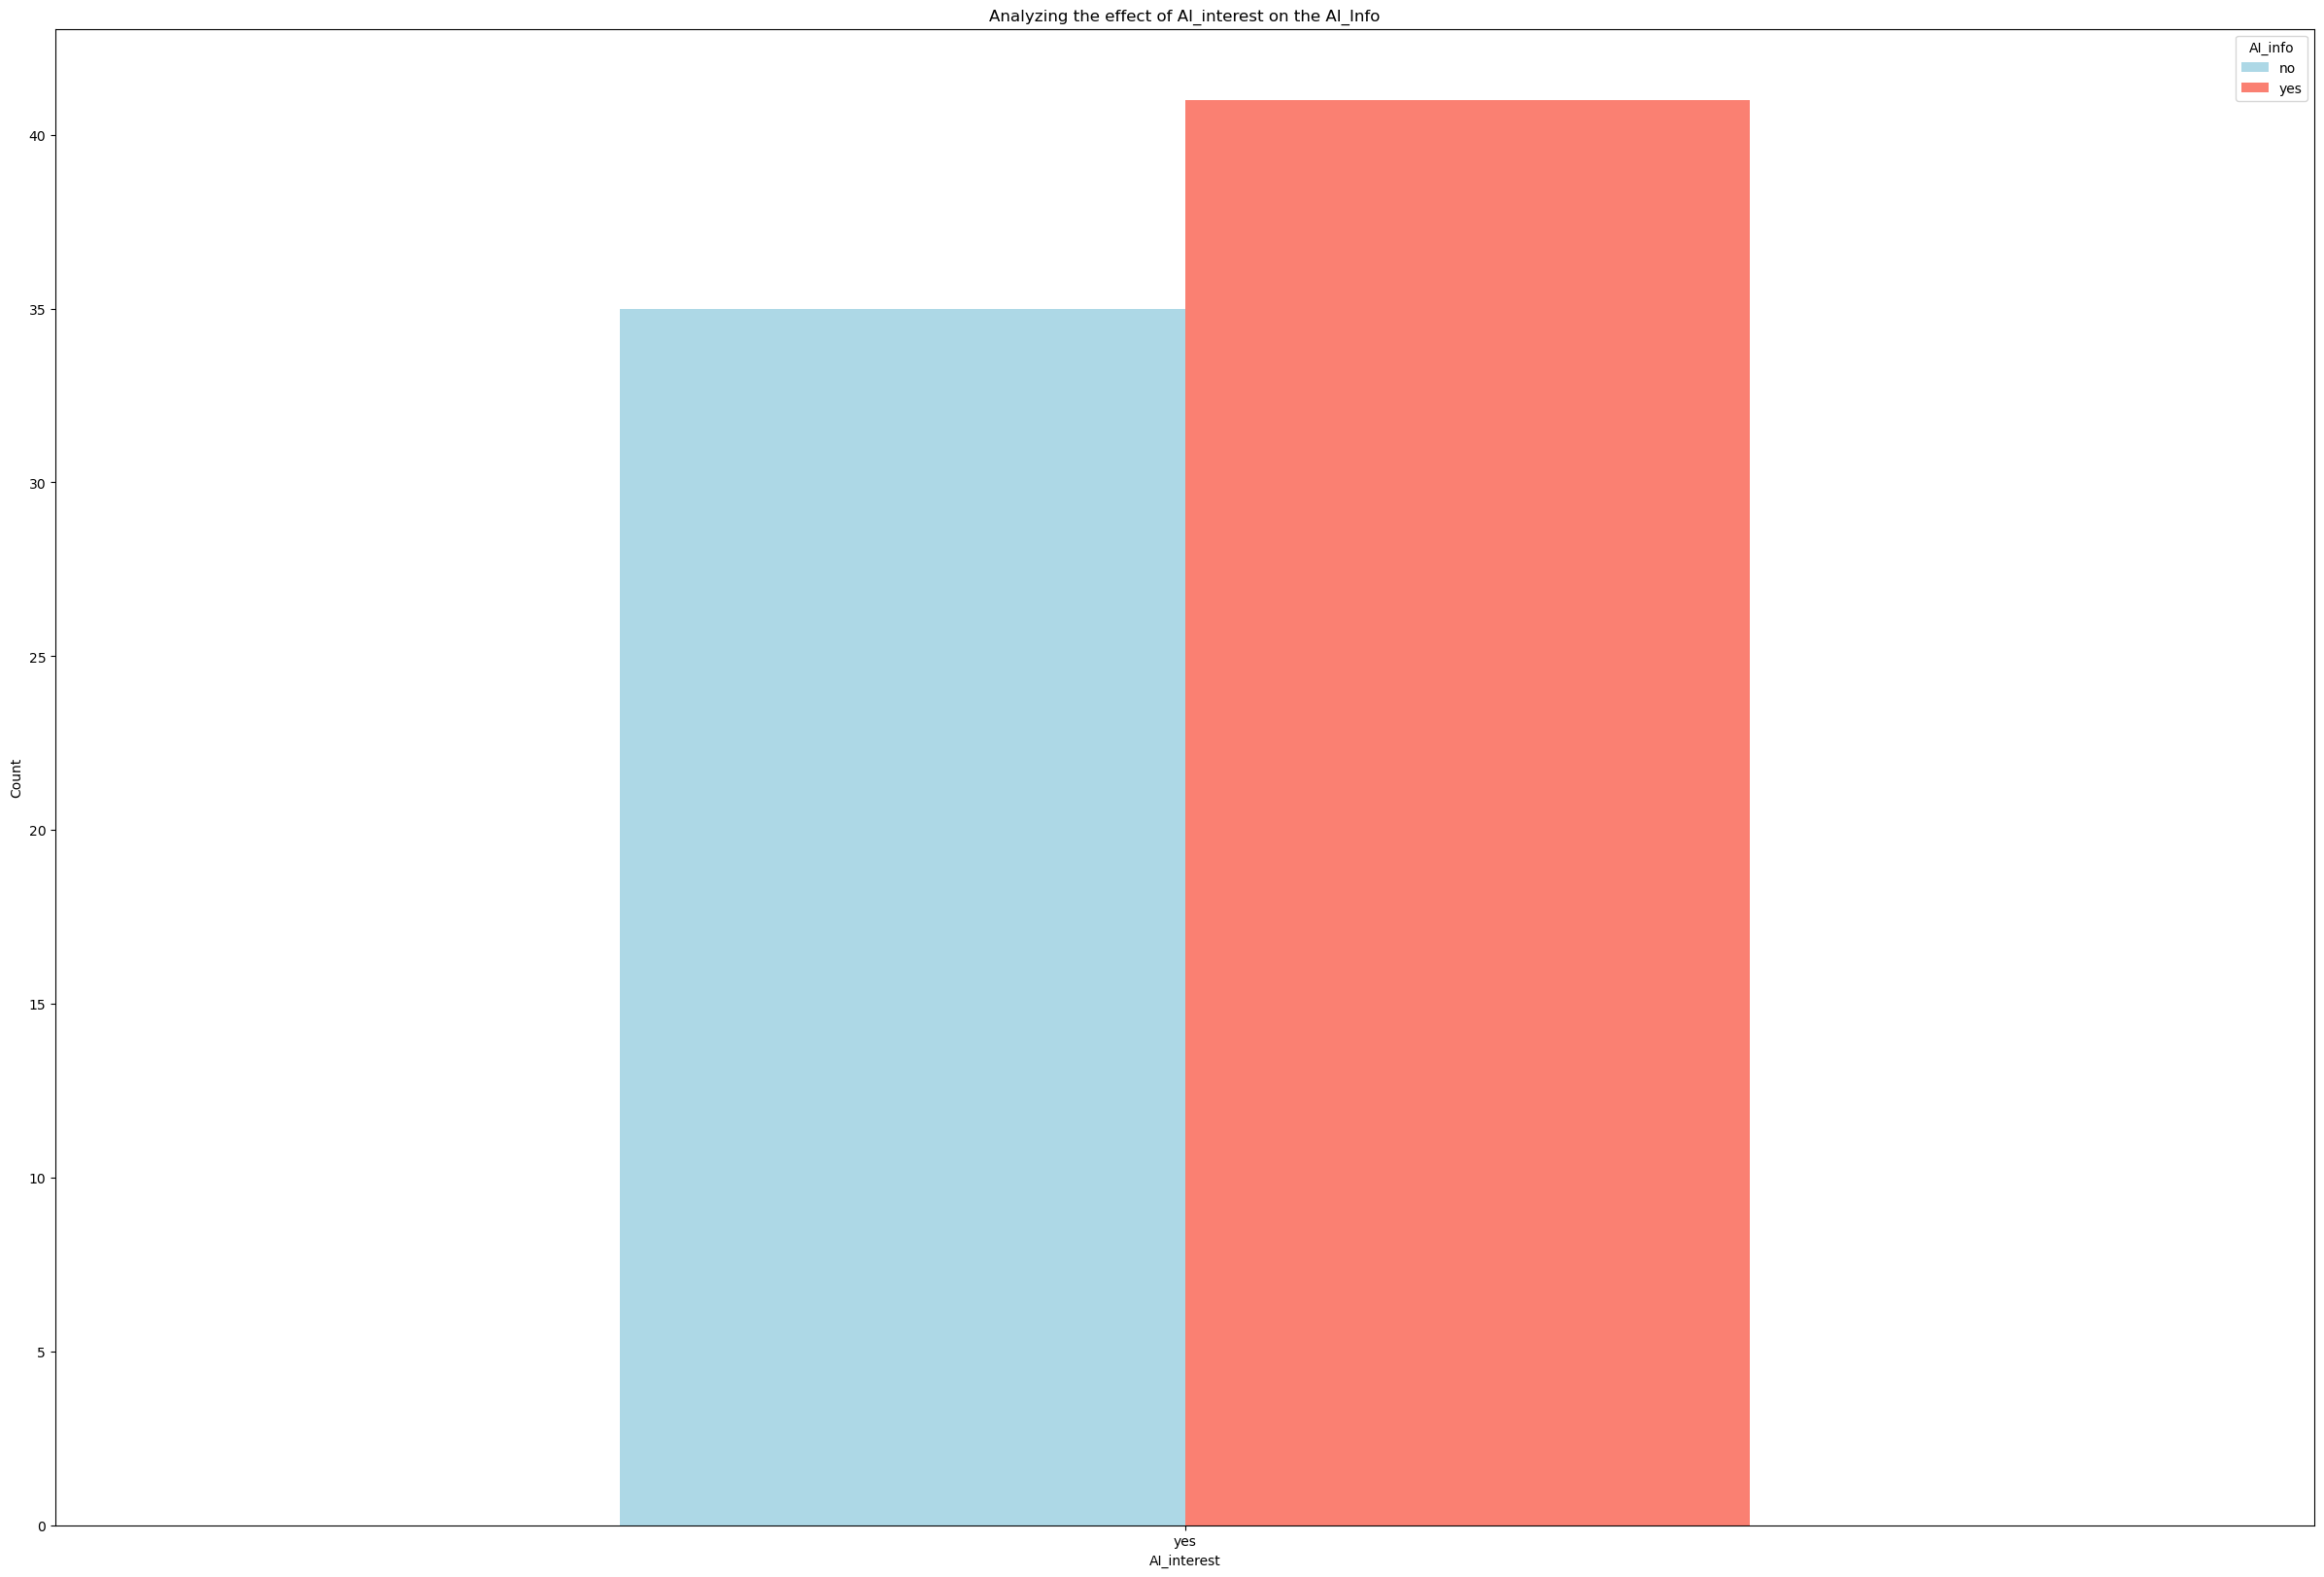

In [11]:
# the effect of the loan Sector on the acceptance of the loan
pd.crosstab(df["AI_interest"], df["AI_info"]).plot(
    kind="bar", figsize=(30, 20), color=["lightblue", "salmon"]
)
plt.title(f"Analyzing the effect of AI_interest on the AI_Info")
plt.xlabel("AI_interest")
plt.ylabel(f"Count")
plt.xticks(rotation=0)
# save the plot
plt.savefig(f"./images/AI_interest_AI_info.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
# calculate the numbner of students who are interested in AI and have information about AI
AI_info = df[df["AI_info"] == "yes"]
AI_interest = df[df["AI_interest"] == "yes"]
AI_info_interest = AI_info[AI_info["AI_interest"] == "yes"]
print(
    f"the number of students who are interested in AI and have information about AI is {AI_info_interest.shape[0]}"
)
# calculate the percentage of students who are interested in AI and have information about AI
print(
    f"the percentage of students who are interested in AI and have information about AI is {100*AI_info_interest.shape[0]/df.shape[0]}"
)

the number of students who are interested in AI and have information about AI is 41
the percentage of students who are interested in AI and have information about AI is 53.94736842105263


In [17]:
# calculate the numbner of students who are interested in AI and don't have information about machine learning
machine_learning_no = df[df["machine_learning"] == "no"]
AI_interest_machine_learning_no = AI_interest[AI_interest["machine_learning"] == "no"]
print(
    f"the number of students who are interested in AI and don't have information about machine learning is {AI_interest_machine_learning_no.shape[0]}"
)
# calculate the percentage of students who are interested in AI and don't have information about machine learning
print(
    f"the percentage of students who are interested in AI and don't have information about machine learning is {100*AI_interest_machine_learning_no.shape[0]/df.shape[0]}"
)

the number of students who are interested in AI and don't have information about machine learning is 38
the percentage of students who are interested in AI and don't have information about machine learning is 50.0


In [20]:
AI_info_ml_no = AI_info[AI_info["machine_learning"] == "no"]
print(
    f"the number of students who have information about AI and don't have information about machine learning is {AI_info_ml_no.shape[0]}"
)
# calculate the percentage of students who have information about AI and don't have information about machine learning
print(
    f"the percentage of students who have information about AI and don't have information about machine learning is {100*AI_info_ml_no.shape[0]/df.shape[0]}"
)

the number of students who have information about AI and don't have information about machine learning is 22
the percentage of students who have information about AI and don't have information about machine learning is 28.94736842105263


In [22]:
# calculate the number of students that don't have information about AI and don't have information about machine learning
AI_info_no = df[df["AI_info"] == "no"]
AI_info_ml_no = AI_info_no[AI_info_no["machine_learning"] == "no"]
print(
    f"the number of students that don't have information about AI and don't have information about machine learning is {AI_info_ml_no.shape[0]}"
)
# calculate the percentage of students that don't have information about AI and don't have information about machine learning
print(
    f"the percentage of students that don't have information about AI and don't have information about machine learning is {100*AI_info_ml_no.shape[0]/df.shape[0]}"
)

the number of students that don't have information about AI and don't have information about machine learning is 22
the percentage of students that don't have information about AI and don't have information about machine learning is 28.94736842105263


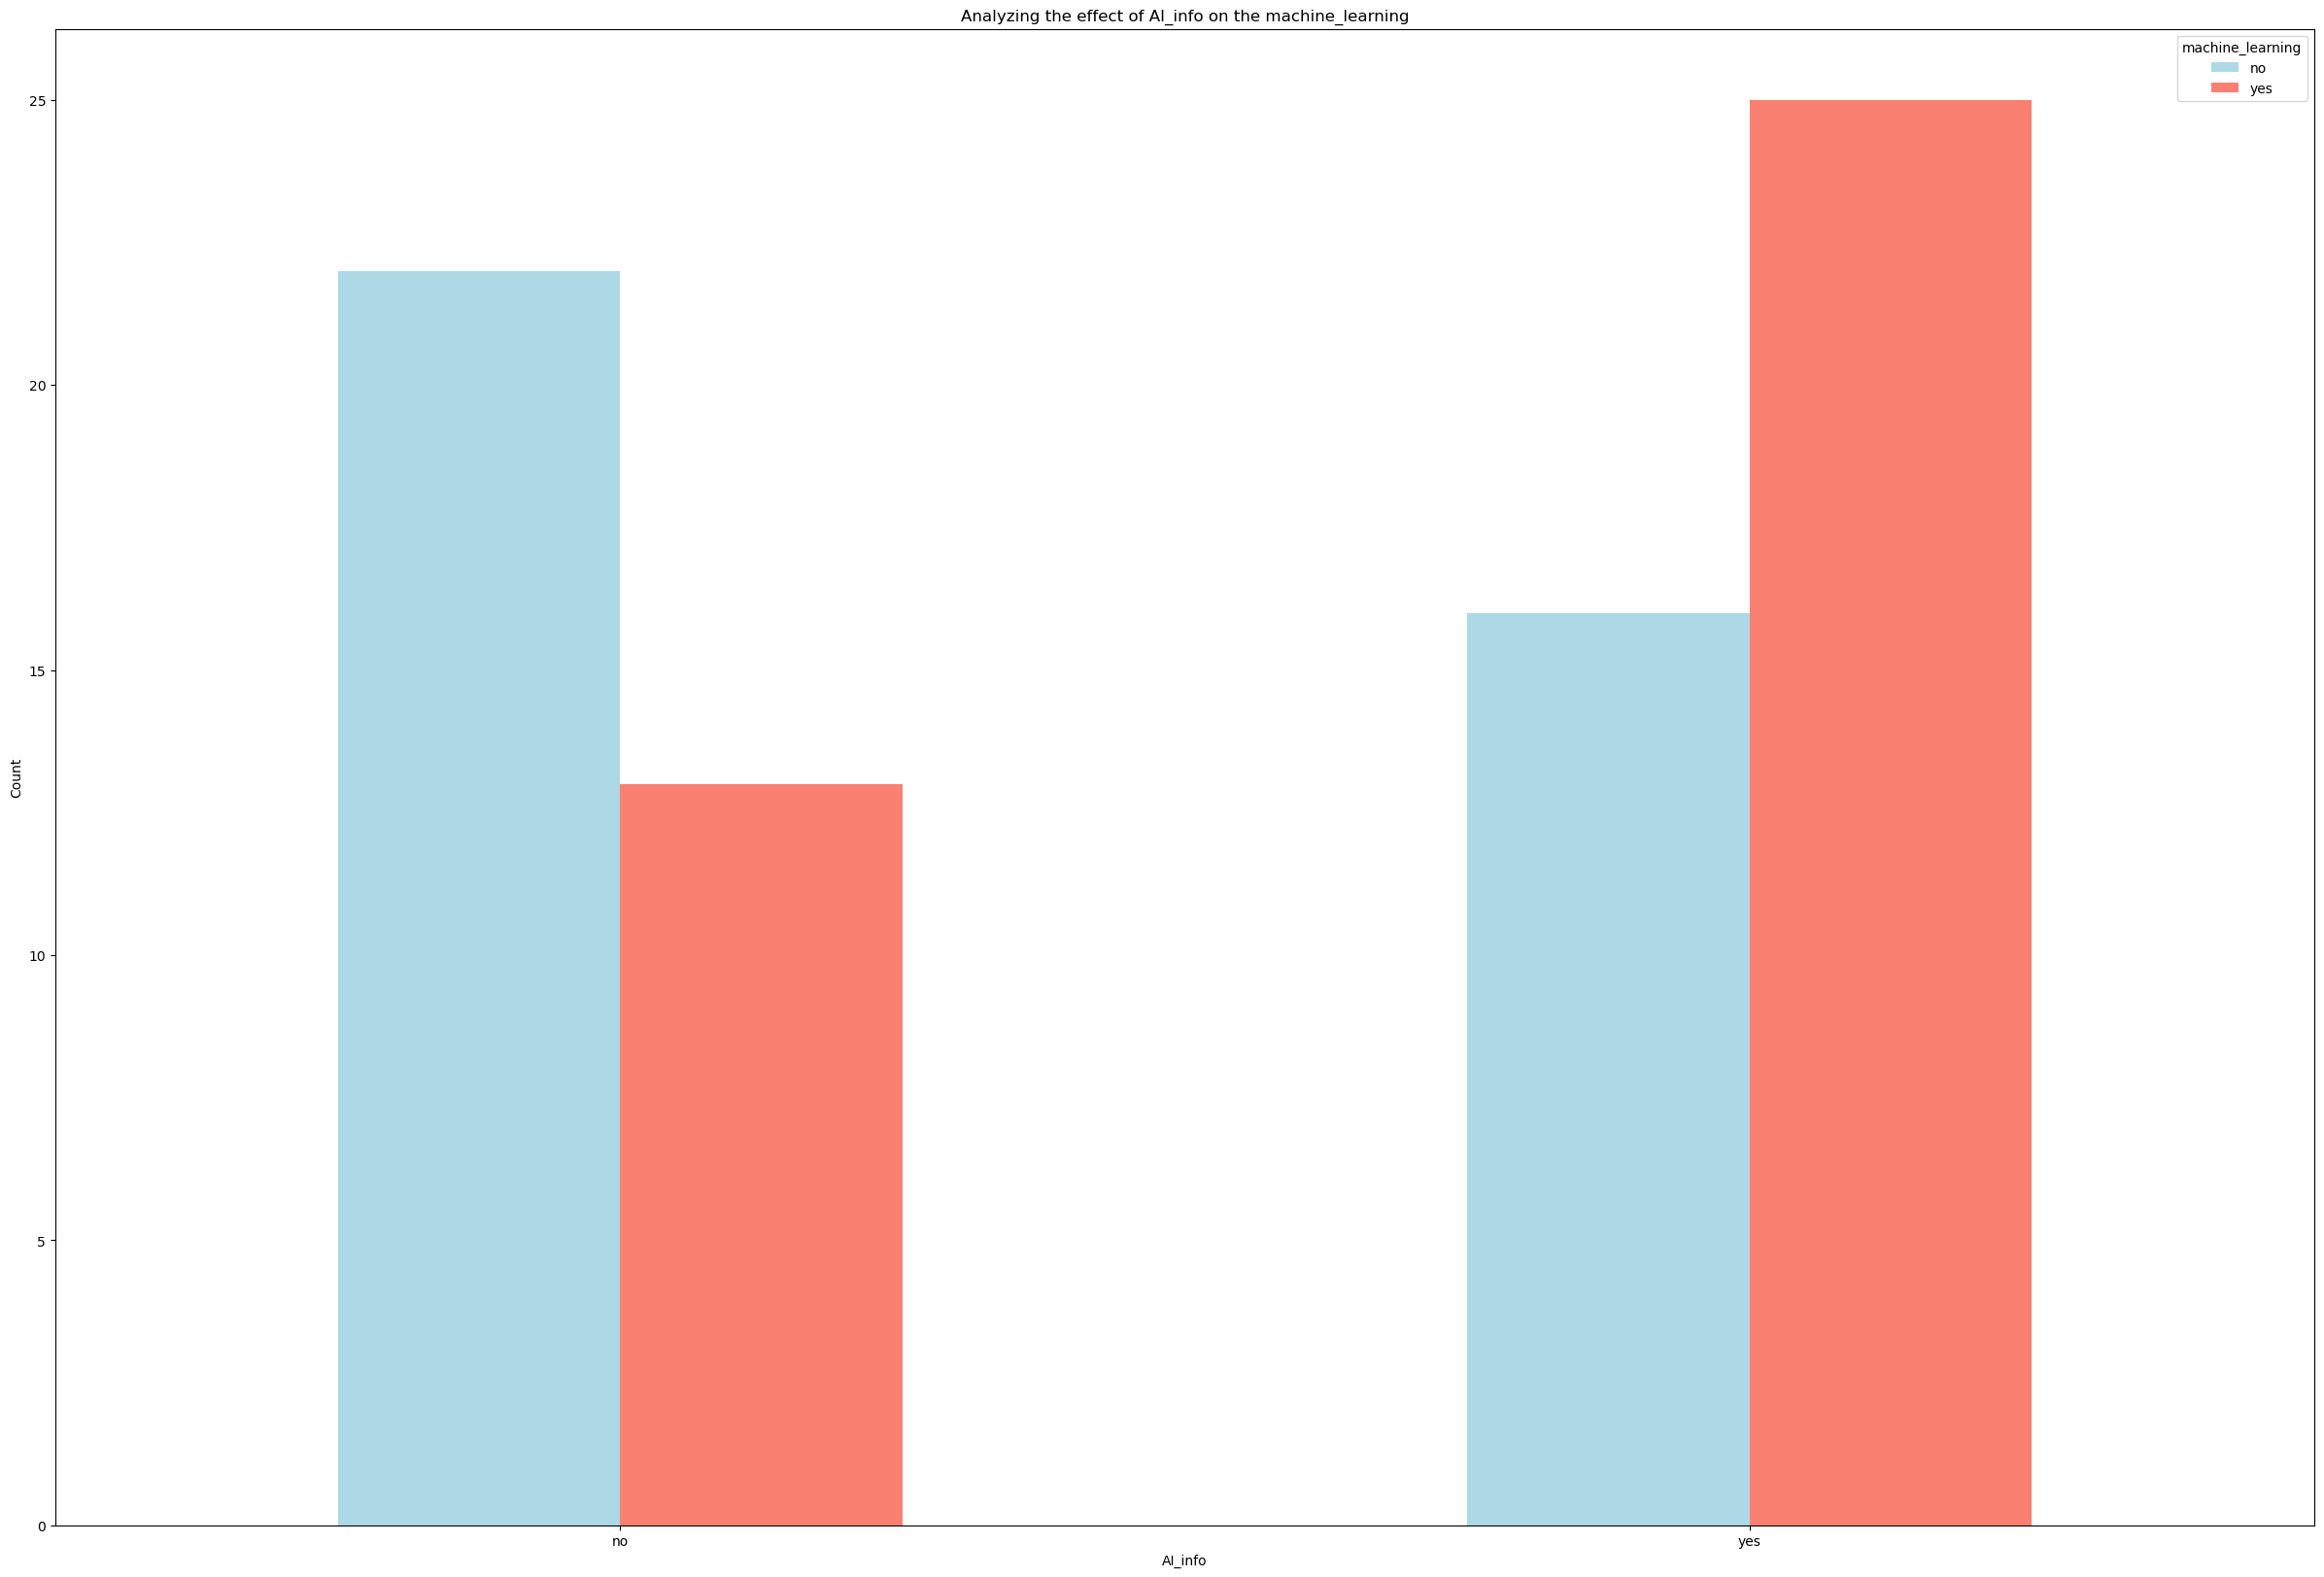

In [21]:
# the effect of the loan Sector on the acceptance of the loan
pd.crosstab(df["AI_info"], df["machine_learning"]).plot(
    kind="bar", figsize=(30, 20), color=["lightblue", "salmon"]
)
plt.title(f"Analyzing the effect of AI_info on the machine_learning")
plt.xlabel("AI_info")
plt.ylabel(f"Count")
plt.xticks(rotation=0)
# save the plot
plt.savefig(f"./images/AI_info_AI_interest.png", dpi=300, bbox_inches="tight")
plt.show()

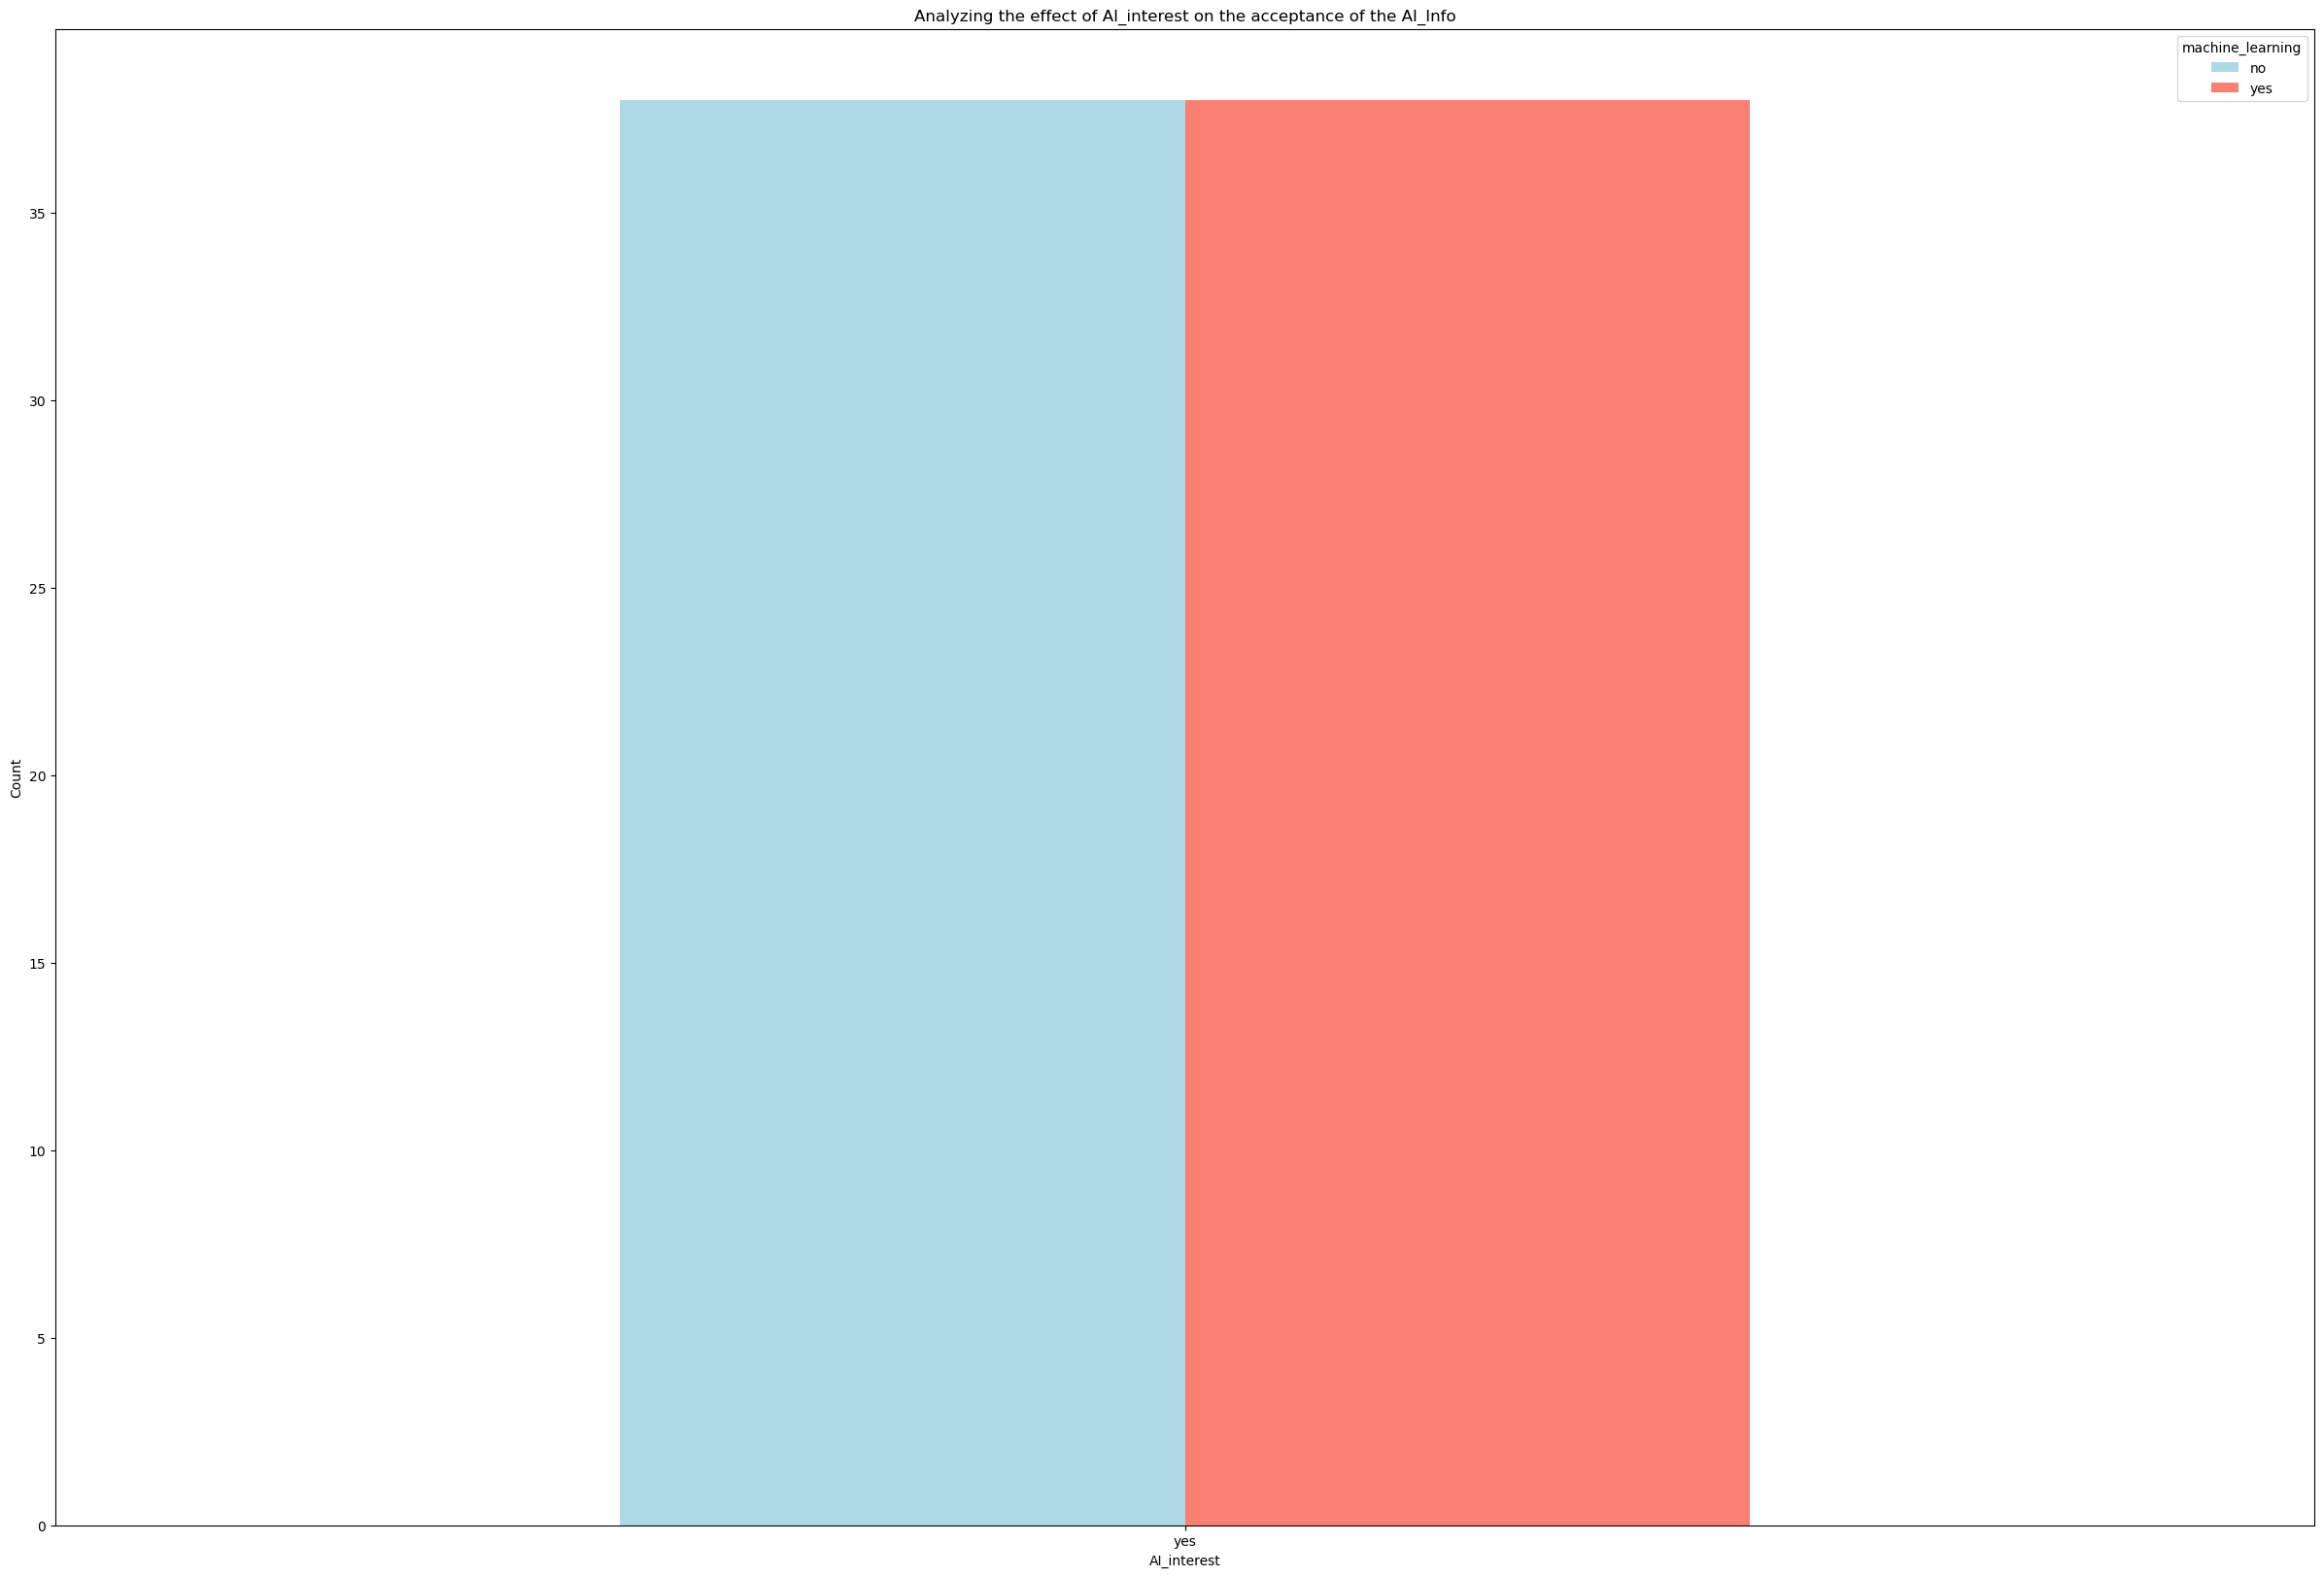

In [11]:
# the effect of the loan Sector on the acceptance of the loan
pd.crosstab(df["AI_interest"], df["machine_learning"]).plot(
    kind="bar", figsize=(30, 20), color=["lightblue", "salmon"]
)
plt.title(f"Analyzing the effect of AI_interest on the acceptance of the AI_Info")
plt.xlabel("AI_interest")
plt.ylabel(f"Count")
plt.xticks(rotation=0)
# save the plot
plt.savefig(f"./images/AI_interest_AI_info.png", dpi=300, bbox_inches="tight")
plt.show()